# importing needed libraries

In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#importing data sets
1.Trainin data and testing data

In [ ]:
pd.set_option('display.max_columns',None)
df_train=pd.read_excel('/content/Data_Train (1).xlsx')
test_data=pd.read_excel('/content/Test_set (1).xlsx')
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


#data exploration

In [ ]:
# df=pd.concat([df_train,df_test])
# df.head()

In [ ]:
# df.info()

In [ ]:
# [feature for feature in df.columns if df[feature].isnull().sum()>0]

In [ ]:
# df.isnull().sum()

In [ ]:
df_train.dropna(inplace=True)

In [ ]:
df_train.shape

(10682, 11)

In [ ]:
df_train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [ ]:
df_train['Airline'].unique()


array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [ ]:
df_train['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [ ]:
df_train.dtypes

,0
Airline,object
Date_of_Journey,object
Source,object
Destination,object
Route,object
Dep_Time,object
Arrival_Time,object
Duration,object
Total_Stops,object
Additional_Info,object


In [ ]:
df_train.shape

(10682, 11)

In [ ]:
# df_train['Duration'].unique()

In [ ]:
df_train['Duration'].value_counts()

,count
Duration,
2h 50m,550
1h 30m,386
2h 55m,337
2h 45m,337
2h 35m,329
...,...
30h 10m,1
31h 30m,1
42h 5m,1


#performing EDA


from the dataset we can see there are a lot of string features among them Date_of_Journey is also one of them.

so we need to convert string datatype to numerical via timestamp for proper prediction

for this we convert Date_of_Journey into datetime dtype and extract date and month from the Date_of_Journey

In [ ]:
df_train['Date_of_Journey'].unique()

array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
       '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
       '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
       '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
       '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)

# encoding the datetime into different feature for easier prediction

In [ ]:
# df_train['journey_day']=pd.to_datetime(df_train.Date_of_Journey,format="%d/%m/%Y").dt.day
# df_train['journey_month']=pd.to_datetime(df_train.Date_of_Journey,format="%d/%m/%Y").dt.month


df_train['journey_day']=pd.to_datetime(df_train.Date_of_Journey,format="%d/%m/%Y").dt.day
df_train['journey_month']=pd.to_datetime(df_train.Date_of_Journey,format="%d/%m/%Y").dt.month

In [ ]:
# df_train.head(1)
df_train.head(1)
# df_train.dtypes

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3


In [ ]:
#dropping date_of_journey we dont need it
df_train.drop('Date_of_Journey',axis=1,inplace=True)

In [ ]:
df_train.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3


In [ ]:
# we can do same process for Departure time cause it also consists of time

# so
# df_train['dep_hour']=pd.to_datetime(df_train['Dep_Time']).dt.hour
# df_train['dep_min']=pd.to_datetime(df_train['Dep_Time']).dt.minute
df_train['dep_hour']=pd.to_datetime(df_train['Dep_Time']).dt.hour
df_train['dep_min']=pd.to_datetime(df_train['Dep_Time']).dt.minute


df_train.drop('Dep_Time',axis=1,inplace=True)

/tmp/ipython-input-1824471375.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_train['dep_hour']=pd.to_datetime(df_train['Dep_Time']).dt.hour
/tmp/ipython-input-1824471375.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_train['dep_min']=pd.to_datetime(df_train['Dep_Time']).dt.minute


In [ ]:
df_train.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50


In [140]:
df_train.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'journey_day', 'journey_month', 'dep_hour', 'dep_min', 'arrival_hour',
       'arrival_min', 'duration_hours', 'duration_mins'],
      dtype='object')

In [ ]:
# arrival time is smilar to date_of_journey we can extract value from it

#extracting arrival hour
df_train['arrival_hour']=pd.to_datetime(df_train.Arrival_Time).dt.hour


#extracting  arrival minutes
df_train['arrival_min']=pd.to_datetime(df_train.Arrival_Time).dt.minute

df_train.drop('Arrival_Time',axis=1,inplace=True)

/tmp/ipython-input-3385982143.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_train['arrival_hour']=pd.to_datetime(df_train.Arrival_Time).dt.hour
/tmp/ipython-input-3385982143.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_train['arrival_min']=pd.to_datetime(df_train.Arrival_Time).dt.minute


In [ ]:
df_train.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10


In [ ]:
from os import sep

#converting duration column into list
# duration=list(df_train['Duration'])

# for i in range(len(duration)):
#   if len(duration[i].split())   !=2:
#     if 'h' in duration[i]:
#       duration[i]=duration[i].strip()  + " 0m"
#     else:
#       duration[i]="0h "+duration[i]


# duration=list(df_train['Duration'])

# for feature in range(len(duration)):
#   if(len(duration[feature].split())) !=2:  #checks if the data[feature ]has hour and minte or not

#     if 'h' in duration[feature]:
#       duration[feature]=duration[feature] + ' 0m'   # if only hour is present adds '0m' on right hand side
#     else:
#       duration[feature]='0h ' +duration[feature]  # if only minute adds hour on left side

#   duration_hours=[]
#   duration_mins=[]

#   for i in range(len(duration)):
#     duration_hours.append(duration[feature].split(sep='h')[0])
#     duration_mins.append(duration[feature].split(sep='m')[0].split()[-1])


duration=list(df_train['Duration'])

for feature in range(len(duration)):
  if(len(duration[feature].split())  !=2):
    if 'h' in duration[feature]:
      duration[feature]=duration[feature]   + " 0m"
    else:
      duration[feature]= "0h "+duration[feature]


duration_hours=[]
duration_mins=[]

for feature in range(len(duration)):
  duration_hours.append(duration[feature].split(sep='h')[0])
  duration_mins.append(duration[feature].split(sep='m')[0].split()[-1])







In [ ]:
df_train['duration_hours']=duration_hours
df_train['duration_mins']=duration_mins


df_train['duration_hours']=df_train['duration_hours'].astype(int)
df_train['duration_mins']=df_train['duration_mins'].astype(int)



In [ ]:
df_train.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50


In [ ]:
df_train.drop('Duration',axis=1,inplace=True)

#handling the categorical data

there are various ways to hanldle categorical features

some of the categorical data are
#nominal --> data has no any order --> we will use one hot encoding

# ordinal data -> data are in order --> we will use lavel encoder

In [ ]:
df_train['Airline'].value_counts()

,count
Airline,
Jet Airways,3849
IndiGo,2053
Air India,1751
Multiple carriers,1196
SpiceJet,818
Vistara,479
Air Asia,319
GoAir,194
Multiple carriers Premium economy,13


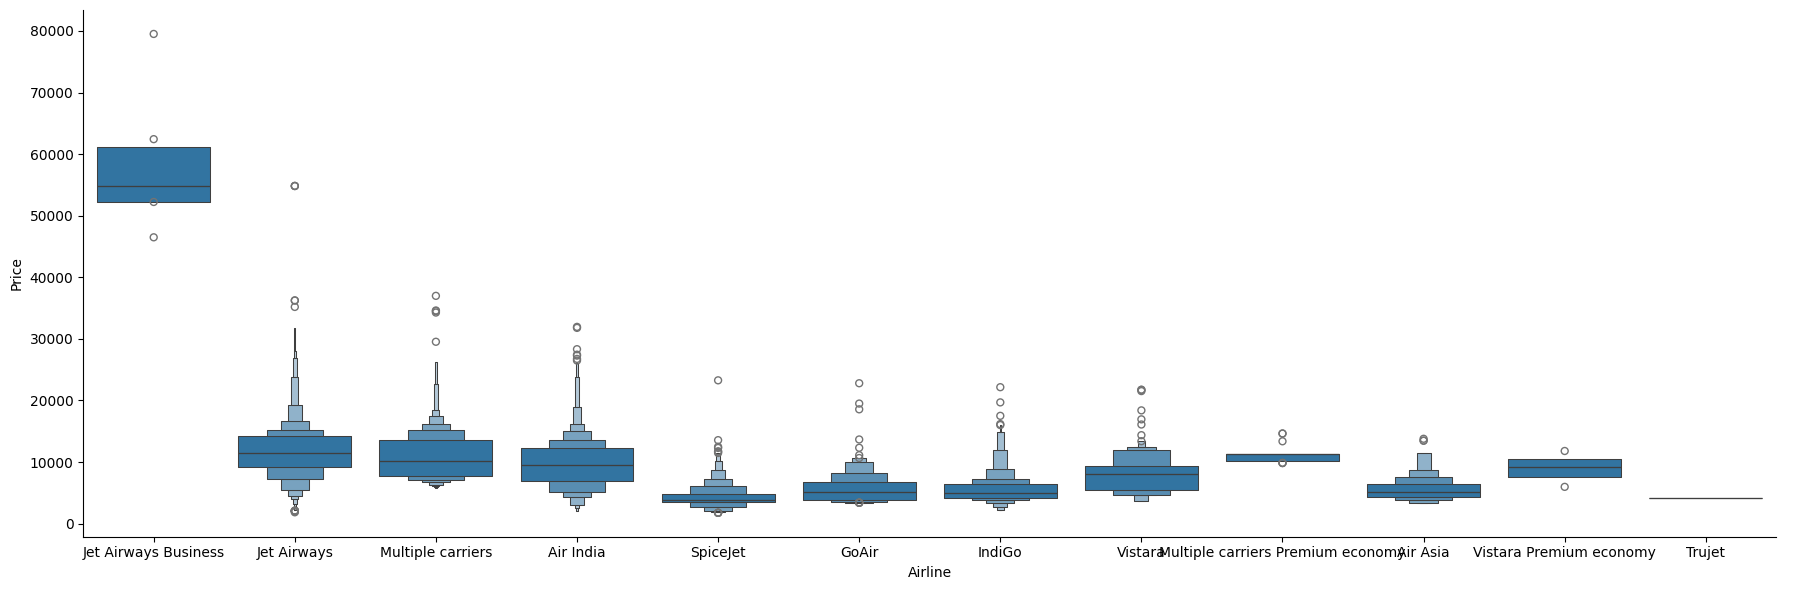

In [ ]:
# sns.catplot(x='Airline',y='Price',data=df_train.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)
sns.catplot(x='Airline',y='Price',data=df_train.sort_values('Price',ascending=False),kind='boxen',aspect=3,height=6)
# sns.catplot(x=df_train['Airline'],y=df_train['Price'],data=df_train.sort_values('Price',ascending=False,),kind='strip',height=6,aspect=3)


In [ ]:
# since it is a ordinal categorical feature we will use get_dummies and do one_hot encoding

# airline=pd.get_dummies(df_train['Airline'],drop_first=True).astype(int)
# airline.head()

airline=pd.get_dummies(df_train['Airline'],drop_first=True).astype(int)
airline.head(1)

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
df_train['Source'].unique()
df_train['Source'].value_counts()

,count
Source,
Delhi,4536
Kolkata,2871
Banglore,2197
Mumbai,697
Chennai,381


<Axes: xlabel='Source', ylabel='Price'>

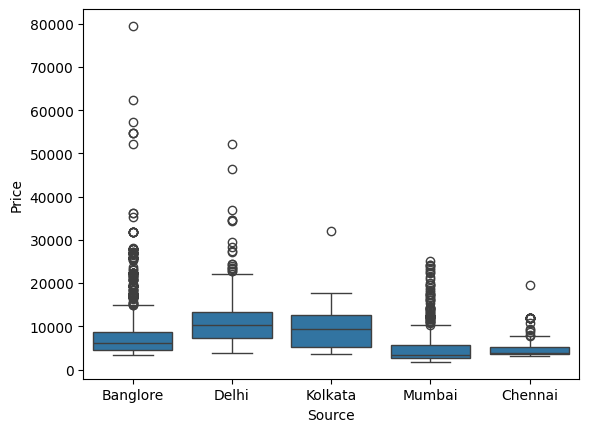

In [ ]:
# sns.catplot(x='Source',y='Price',data=df_train.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)
# plt.figure(figsize=(17,15))
sns.boxplot(x='Source',y='Price',data=df_train.sort_values('Price',ascending=False))

# encoding the categorical features

In [ ]:
source=df_train['Source']

Source=pd.get_dummies(source,drop_first=True).astype(int)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [ ]:
destination=df_train['Destination']


Destination=pd.get_dummies(destination,drop_first=True).astype(int)
Destination

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
10678,0,0,0,0,0
10679,0,0,0,0,0
10680,0,1,0,0,0
10681,0,0,0,0,1


In [ ]:
df_train.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50


In [ ]:
# df_train['Additional_Info'].unique()
df_train['Additional_Info'].value_counts()

#more than 80% of info is no info so we can drop it

,count
Additional_Info,
No info,8344
In-flight meal not included,1982
No check-in baggage included,320
1 Long layover,19
Change airports,7
Business class,4
No Info,3
1 Short layover,1
Red-eye flight,1


In [ ]:
df_train['Route']

,Route
0,BLR → DEL
1,CCU → IXR → BBI → BLR
2,DEL → LKO → BOM → COK
3,CCU → NAG → BLR
4,BLR → NAG → DEL
...,...
10678,CCU → BLR
10679,CCU → BLR
10680,BLR → DEL
10681,BLR → DEL


In [ ]:
#also total stops and route  are related we can keep total stops as it also gives the same info related to route so we are dropping route also


df_train.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [ ]:
df_train.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [ ]:
df_train['Total_Stops'].value_counts()

,count
Total_Stops,
1 stop,5625
non-stop,3491
2 stops,1520
3 stops,45
4 stops,1


In [ ]:
# we can perform one hot encoding through mapping also like this
# df_train['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4stops':4})

#vased on the data as stops incresases the price also increases haith

df_train.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)


df_train['Total_Stops']=df_train['Total_Stops'].astype(int)


/tmp/ipython-input-3786141942.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)


In [ ]:
df_train.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [ ]:
#comvining all the encoded data
new_train=pd.concat([df_train,airline,Source,Destination],axis=1)
new_train.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,duration_hours,duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
new_train.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [ ]:
new_train.head()

,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,duration_hours,duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


we donot comvine train and test data and to data preprocessing cause

data leakage can take place we may not know it vut there may ve so preprocess the data seperately

In [ ]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


# doing all the steps that we did for training data to testing in one go

In [ ]:

print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True).astype(int)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True).astype(int)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True).astype(int)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

/tmp/ipython-input-3427910324.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
/tmp/ipython-input-3427910324.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
/tmp/ipython-input-3427910324.py:26: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
/tmp/ipython-input-3427910324.py:27: UserWarning: Could not infer format, so each element will be parsed individual

In [ ]:
data_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
# dfjddl

#feature encoding

finding the vest feature which will help predict target feature and which feature have good realtion with target feature




*   Heatmap
*   feature_importance
*   selectkVest



In [ ]:
new_train.columns

Index(['Total_Stops', 'Price', 'journey_day', 'journey_month', 'dep_hour',
       'dep_min', 'arrival_hour', 'arrival_min', 'duration_hours',
       'duration_mins', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')

In [ ]:
new_train.shape

(10682, 30)

In [ ]:
X=new_train.drop('Price',axis=1)
# X=new_train.drop('Price',axis=1)
X.head()


,Total_Stops,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,duration_hours,duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
y=new_train['Price']
y.head()

,Price
0,3897
1,7662
2,13882
3,6218
4,13302


In [141]:
df_train.head(4)

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         10682 non-null  object
 1   Source          10682 non-null  object
 2   Destination     10682 non-null  object
 3   Total_Stops     10682 non-null  int64 
 4   Price           10682 non-null  int64 
 5   journey_day     10682 non-null  int32 
 6   journey_month   10682 non-null  int32 
 7   dep_hour        10682 non-null  int32 
 8   dep_min         10682 non-null  int32 
 9   arrival_hour    10682 non-null  int32 
 10  arrival_min     10682 non-null  int32 
 11  duration_hours  10682 non-null  int64 
 12  duration_mins   10682 non-null  int64 
dtypes: int32(6), int64(4), object(3)
memory usage: 1.1+ MB


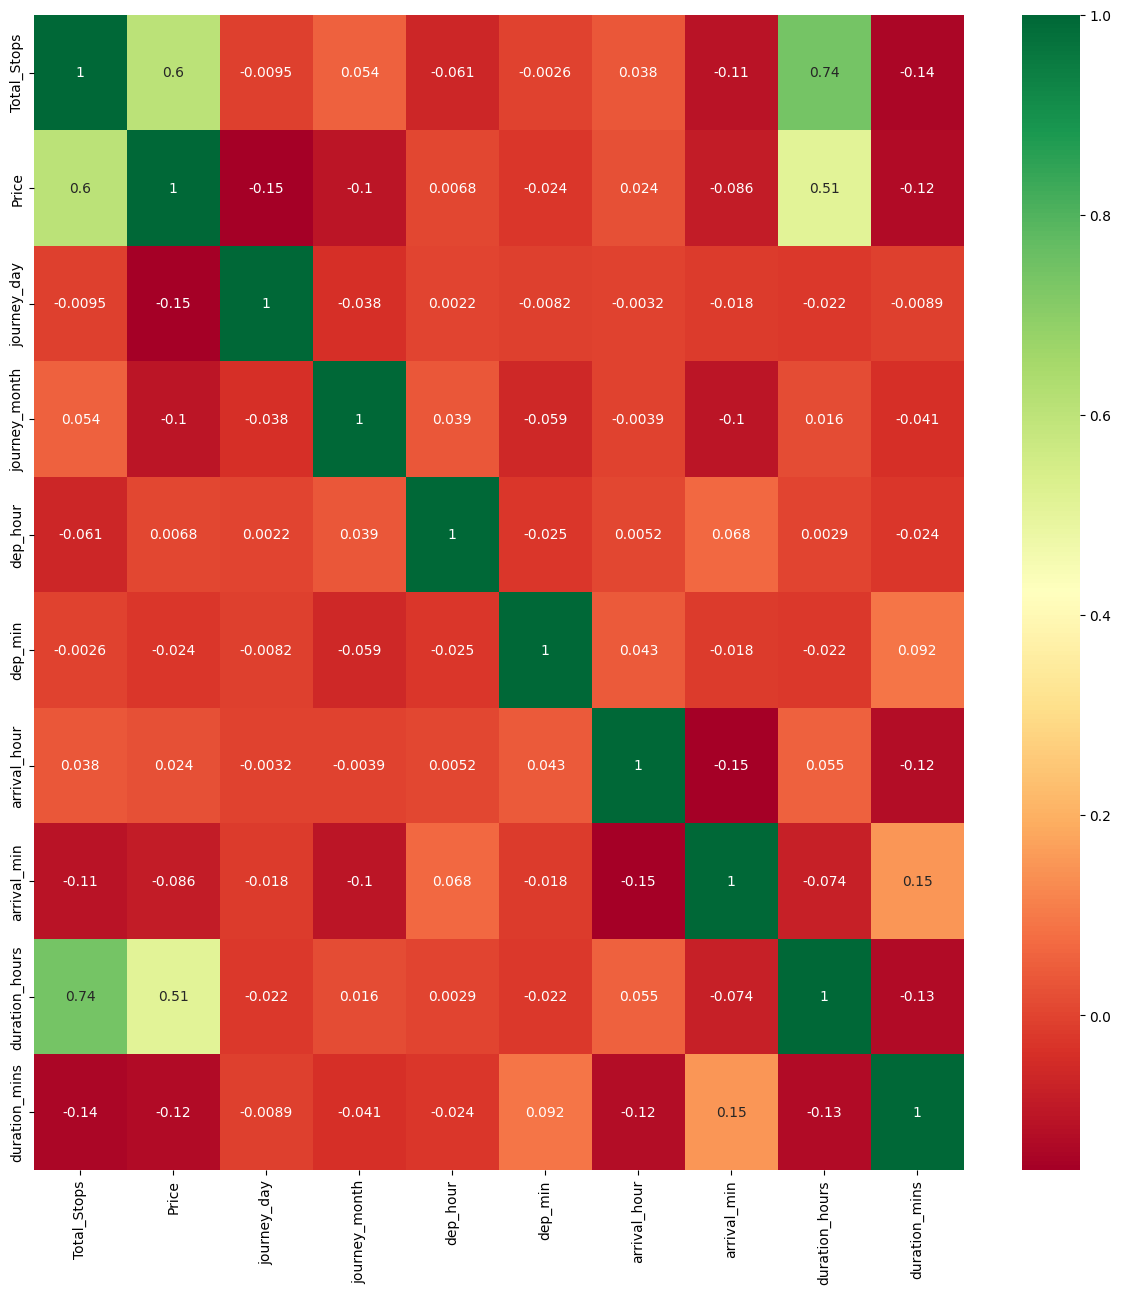

In [ ]:
plt.figure(figsize=(15,15))

sns.heatmap(df_train.corr(numeric_only=True),annot=True,cmap='RdYlGn')
plt.show()

#choosing best features with respect to Price  using extra tree regressor

In [ ]:
# [feature for feature in df_train.corr(numeric_only=True).abs().columns if any(df_train.corr(numeric_only=True).abs()>0.80)]

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

tree=ExtraTreesRegressor()
tree.fit(X,y)

ExtraTreesRegressor()

<Axes: >

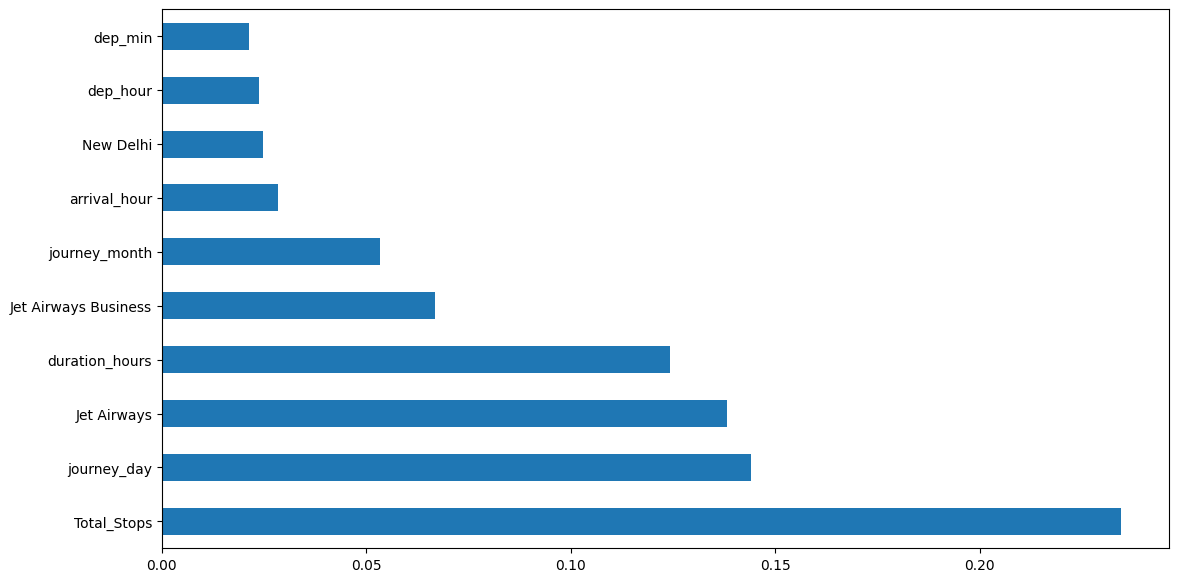

In [80]:
# plt.figure(figsize=(13,8))
# feat_importance=pd.Series(tree.feature_importances_,index=X.columns)
# feat_importance.nlargest(20).plot(kind='barh')

plt.figure(figsize=(13,7))
feat_importance=pd.Series(tree.feature_importances_,index=X.columns)
feat_importance.nlargest(10).plot(kind='barh')

#splitting the data using train test split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model used for prediction RandomForestRegressor

In [81]:
from sklearn.ensemble import RandomForestRegressor

regressor=RandomForestRegressor()
# regressor.fit(X_train,y_train)
regressor.fit(X_train,y_train)

RandomForestRegressor()

#Prediction

In [82]:
# y_predict=regressor.predict(X_test)
y_predict=regressor.predict(X_test)


# accuracy score of training data

In [83]:
# regressor.score(X_train,y_train)
regressor.score(X_train,y_train)

0.9530410807588068

# accuracy score of test data

In [84]:
# regressor.score(X_test,y_test)
regressor.score(X_test,y_test)

0.7977096101163709

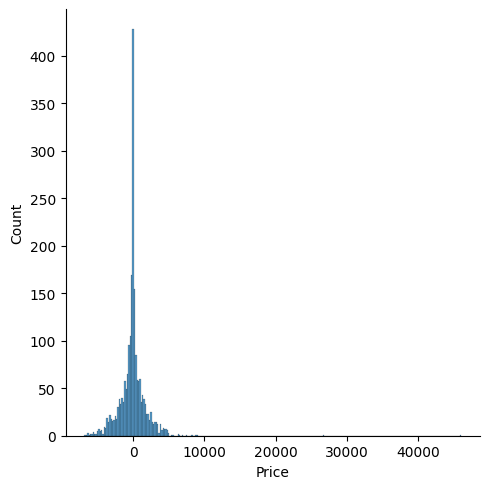

In [86]:
# sns.displot(y_test-y_predict)

sns.displot(y_test-y_predict) # residual

<Axes: xlabel='Price', ylabel='Count'>

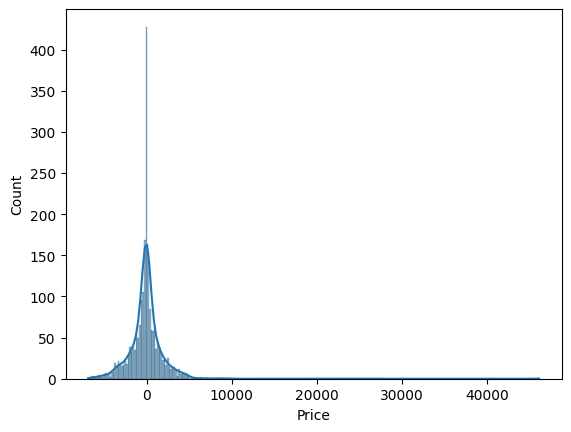

In [87]:
sns.histplot(y_test-y_predict,kde=True)

# its a normal guassian distrivution curve which is good

Text(0, 0.5, 'y-train')

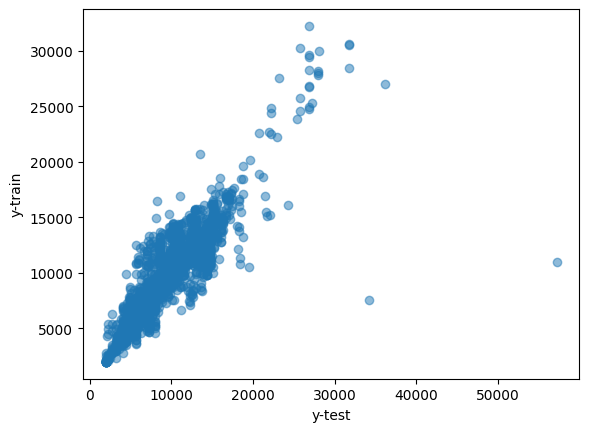

In [ ]:
plt.scatter(y_test,y_predict,alpha=0.5)
plt.xlabel('y-test')
plt.ylabel('y-train')



<Axes: xlabel='Price'>

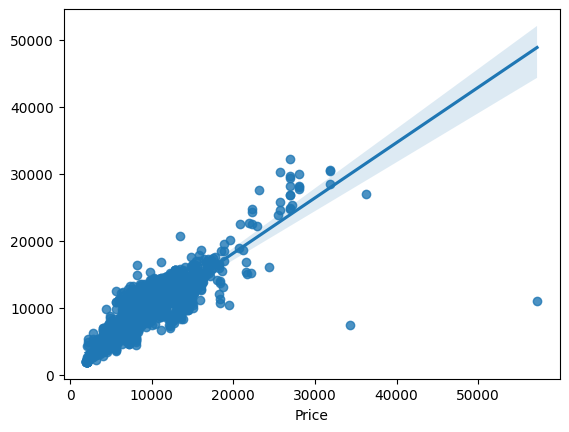

In [ ]:
sns.regplot(x=y_test,y=y_predict)

In [88]:
from sklearn import metrics

In [ ]:
print('MAE',metrics.mean_absolute_error(y_test,y_predict))
print('MSE',metrics.mean_squared_error(y_test,y_predict))
print('RMSE',metrics.root_mean_squared_error(y_test,y_predict))

MAE 1190.0725950883593
MSE 4438011.362533883
RMSE 2106.658814932756


In [ ]:
#mae tells did i make misakes or not and gives the average mistakes
#mse tells if it makes vig mistakes for my it
mae_percent = (1173.86 / y_test.mean()) * 100
print(mae_percent)


12.867443276791835


In [ ]:
metrics.r2_score(y_test,y_predict)

0.7941749480748372

#perfroming hyper parameter tuning for model rigrious training to find the vest parameter which can give vest accuracy

#hyper parameter tuning
so we use tuning methods like


1.   RandomizedSerchCV   -->fast
2.   GridSearchCV

assign hyperparameter in form of dictionary
fit the model
check vest parameters and vest score



In [89]:
from sklearn.model_selection import RandomizedSearchCV


In [97]:
#  # RandomizedsearchCV

# # nmvers of trees in random forest
# n_estimators=[int(feature) for feature in np.linspace(start=100 , stop=1200 , num=12)]
# # numver of features to consider at every split
# max_features=['auto','sqrt']
# #maximum nmver of levels in tree

# max_depth=[int(feature) for feature in np.linspace(5, 30 ,num= 6)]

# #min
# min_samples_split=[2,5,10,15,100]

# #minmum numver of samples required at each leaf node

# min_samples_leaf=[1,2,5,10]

#



#numver of trees various trees vetween 100 to 1200 random tree numver for different tree making
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200 ,num=10)]

# max feature

max_feature=['sqrt','auto']

#max_depth
max_depth=[int(x) for x in np.linspace(6, 30 , num=5)]

# min sample split tells how A node will split only if it has at least this many samples.
min_samples_split=[2,5,10,30,15,100]

# Minimum number of samples required at a leaf node.
min_samples_leaf=[1,2,6,7,10]

In [98]:
# create random grid

# random_grid={'n_estimators':n_estimators,
#              'max_features':max_features,
#              'max_depth':max_depth,
#              'min_samples_split':min_samples_split,
#              'min_samples_leaf':min_samples_leaf,

#              }


random_grid={
    'n_estimators':n_estimators,
    'max_feature':max_feature,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,

}
param_distri={
    'n_estimators':n_estimators,
    'max_feature':max_feature,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,

}

In [104]:










#numver of trees various trees vetween 100 to 1200 random tree numver for different tree making
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200 ,num=10)]

# max feature

max_features=['sqrt','auto']

#max_depth
max_depth=[int(x) for x in np.linspace(6, 30 , num=5)]

# min sample split tells how A node will split only if it has at least this many samples.
min_samples_split=[2,5,10,30,15,100]

# Minimum number of samples required at a leaf node.
min_samples_leaf=[1,2,6,7,10]



param_distri={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,

}



random_search=RandomizedSearchCV(
    estimator=regressor,
    param_distributions=param_distri,
    n_iter=10,
    cv=5,
    random_state=42,
    scoring='neg_mean_squared_error',
    verbose=2,
    n_jobs=-1  # use all processor core availavle
)



random_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [6, 12, 18, 24, 30],
                                        'max_features': ['sqrt', 'auto'],
                                        'min_samples_leaf': [1, 2, 6, 7, 10],
                                        'min_samples_split': [2, 5, 10, 30, 15,
                                                              100],
                                        'n_estimators': [100, 222, 344, 466,
                                                         588, 711, 833, 955,
                                                         1077, 1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [105]:
# rf_random=RandomizedSearchCV(estimator=regressor,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,random_state=42)

In [107]:



random_search.best_estimator_

RandomForestRegressor(max_depth=18, max_features='sqrt', min_samples_split=30,
                      n_estimators=1077)

In [108]:
random_search.best_params_

{'n_estimators': 1077,
 'min_samples_split': 30,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 18}

In [109]:
random_search.best_score_

np.float64(-4899901.47653355)

In [110]:
prediction=random_search.predict(X_test)

prediction

array([16004.73807836,  6665.0648136 ,  8603.94792845, ...,
        6949.49572497, 11964.71276116, 12356.8613686 ])

<Axes: xlabel='Price', ylabel='Count'>

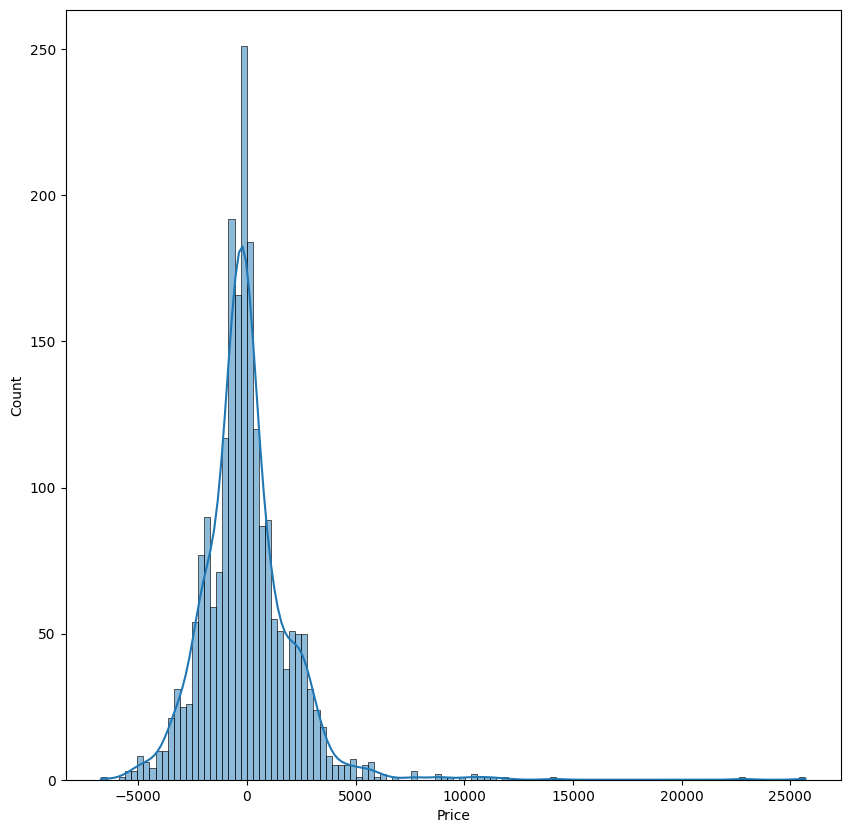

In [118]:
plt.figure(figsize=(10,10))
# sns.displot(y_test-prediction)
sns.histplot(y_test-prediction,kde=True)

<Axes: xlabel='Price'>

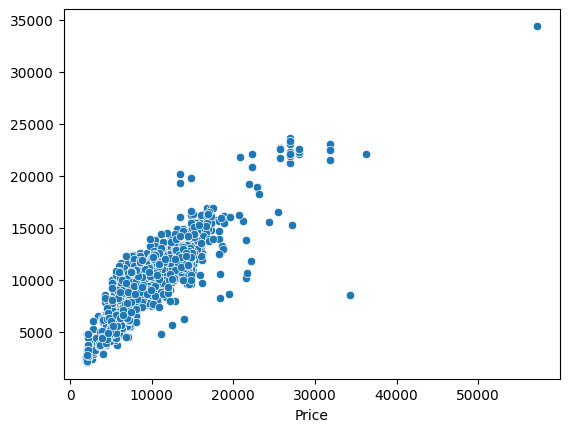

In [119]:
sns.scatterplot(x=y_test,y=prediction)

<Axes: xlabel='Price'>

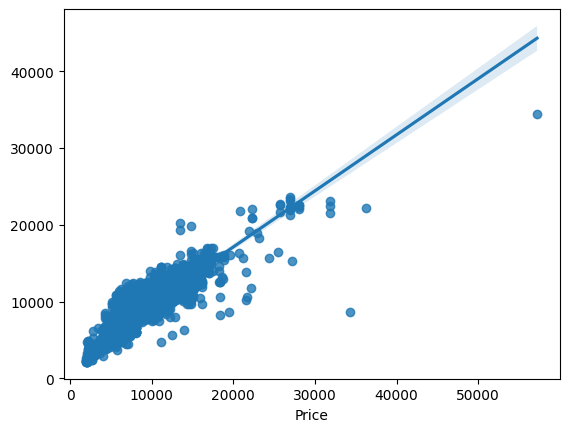

In [121]:
sns.regplot(x=y_test,y=prediction)

In [120]:
print('MAE',metrics.mean_absolute_error(y_test,prediction))
print('MSE',metrics.mean_squared_error(y_test,prediction))
print('RMSE',metrics.root_mean_squared_error(y_test,prediction))

MAE 1380.687171308286
MSE 4317965.586597139
RMSE 2077.971507648057


# saving the file

In [138]:
import joblib
vest_model  =random_search.best_estimator_


joblib.dump(vest_model,'flight_predicion_rf.pkl')
joblib.dump(X.columns.tolist(),'columns.pkl')
# joblib.dump(,'encoder.pkl')

['columns.pkl']

In [131]:
X_train

,Total_Stops,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,duration_hours,duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
10005,1,27,5,8,30,19,15,10,45,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3684,1,9,5,11,30,12,35,25,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1034,1,24,4,15,45,22,5,6,20,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
3909,1,21,3,12,50,1,35,12,45,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3088,2,24,6,17,15,19,15,26,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,1,27,3,9,0,4,25,19,25,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
5191,1,9,5,14,5,20,45,6,40,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5390,1,15,5,12,50,1,30,12,40,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
860,0,3,3,0,40,3,25,2,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [135]:
model=joblib.load('/content/flight_predicion_rf.pkl')

preedict=model.predict(X_test)

In [136]:
metrics.r2_score(y_test,preedict)

0.7997424029655948